**Assessment of Binding Affinity via Alchemical Free Energy Calculations**

Maximilian Kuhn, Stuart Firth-Clark, Paolo Tosco, Antonia S.J.S. Mey, Mark Mackey, Julien Michel

This notebook generates correlation plots for data of this study of the raw DDG edges. 

Analysis adapted from freenergyframework and a plotting example by Hannah Bruce McDonald:
https://github.com/choderalab/freeenergyframework/blob/master/freeenergyframework/examples/WhyNotToUseR2ForDDG.ipynb

In [1]:
%pylab inline
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import sklearn.metrics
import scipy.stats
import copy
import os

sns.set_context("notebook", font_scale=1.2)

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Set the base directory for your analysis here:
base_dir = '/Users/toni_brain/Downloads/Flare_results/wang_2015_datasets/'

In [3]:
def compute_statistic(y_true_sample, y_pred_sample):
    """Compute requested statistic.

    Parameters
    ----------
    y_true : ndarray with shape (N,)
        True values
    y_pred : ndarray with shape (N,)
        Predicted values
    statistic : str
        Statistic, one of ['RMSE', 'MUE', 'R2', 'rho']

    """
    RMSE = np.sqrt(sklearn.metrics.mean_squared_error(y_true_sample, y_pred_sample))
    MUE = sklearn.metrics.mean_absolute_error(y_true_sample, y_pred_sample)
    _, _, r_value, _, _ = scipy.stats.linregress(y_true_sample, y_pred_sample)
    rho = scipy.stats.pearsonr(y_true_sample, y_pred_sample)[0]
    tau = scipy.stats.kendalltau(y_true_sample, y_pred_sample)[0]
    return RMSE, MUE, r_value, rho, tau

In [4]:
def plotting_data(x,y, error=None):
    fig = figure(figsize=(6,6))
    xmin = min(x)
    xmax = max(x)
    corrline = np.linspace(-xmax,xmax,10)

    plt.plot(corrline,corrline, 'k-', alpha=0.5, lw=0.5)

    plt.fill_between(corrline, corrline-1, corrline+1, color='gray', alpha=0.2)
    plt.plot([0, 0], [-xmax, xmax], 'k:', lw=0.5)
    plt.plot([-xmax, xmax], [0, 0], 'k:', lw=0.5)
#     plt.plot([-xmin, -xmax], [xmin, xmax], 'k:')    
    
    plt.errorbar(x,y, yerr=error, lw=0,elinewidth=2, marker='o' )
    title = []
    RMSE, MUE, r_value, rho, tau = compute_statistic(x,y)
    plt.title(f'RMSE:{RMSE:.2}\n MUE:{MUE:.2}\n R:{r_value:.2}\n rho:{rho:.2}\n tau:{tau:.2}\n')
    #plt.show()
    sns.despine()
    plt.xlabel(r'experimental $\Delta \Delta$G [kcal/mol] ')
    plt.ylabel(r'computed $\Delta \Delta$G [kcal/mol]')
    return RMSE, MUE, r_value, rho, tau

## Reading data

In [5]:
def extract_computed_experimental(name='bace', base_dir=base_dir):
    computed_data_name = os.path.join(base_dir,name,'results','summary','fep_results_freenrgworkflow_cresset_valid.csv')
    experi_data_name = os.path.join(base_dir,name,'results','experimental_dG.csv')
    computed_df = pd.read_csv(computed_data_name,comment='#',names=['i', 'j','DDG', 'error'] )
    computed_df.i = computed_df.i.astype(str)
    computed_df.j = computed_df.j.astype(str)
    experi_df = pd.read_csv(experi_data_name, names=['name', 'dG'])
    experi_df.name = experi_df.name.astype(str)
    computed = []
    error_comput = []
    experiment = []
    for index, row in computed_df.iterrows():
        i = experi_df.loc[experi_df['name'] == row['i']]
        j = experi_df.loc[experi_df['name'] == row['j']]
        if str(row['i']).lower().startswith('mk') or str(row['j']).lower().startswith('mk'):
            continue
        elif str(row['i']).endswith('mk') or str(row['j']).endswith('mk'):
            continue
        else:
            ddG = j['dG'].values[0]-i['dG'].values[0]
            experiment.append(ddG)
            computed.append(row['DDG'])
            error_comput.append(row['error'])
    return experiment, computed, error_comput

## Plotting data

### Bace

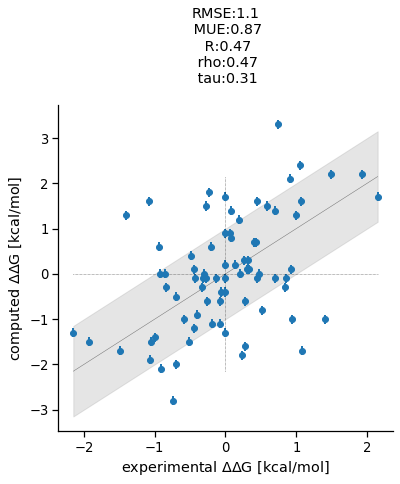

In [6]:
X,Y,error = extract_computed_experimental()
RMSE_start, MUE_start, R_start, rho_start, tau_start = plotting_data(X,Y,error)

### CDK2

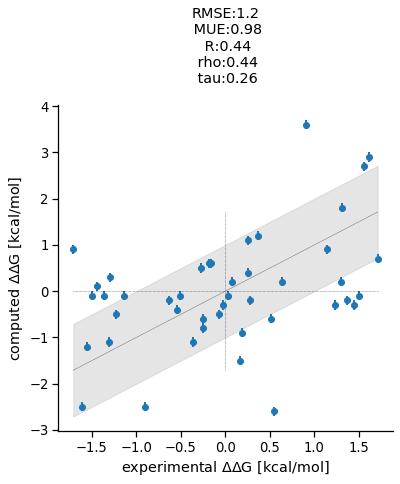

In [7]:
X,Y,error = extract_computed_experimental(name='cdk2')
RMSE_start, MUE_start, R_start, rho_start, tau_start = plotting_data(X,Y,error)

### jnk1

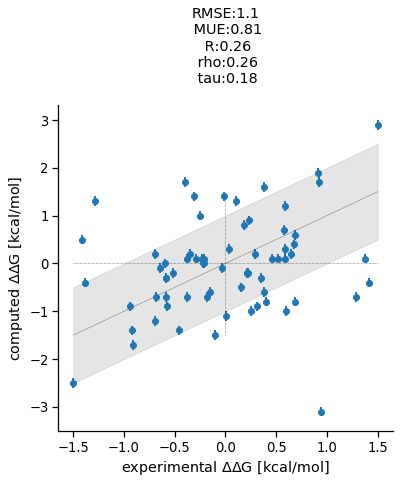

In [8]:
X,Y,error = extract_computed_experimental(name='jnk1')
RMSE_start, MUE_start, R_start, rho_start, tau_start = plotting_data(X,Y,error)

### mcl1

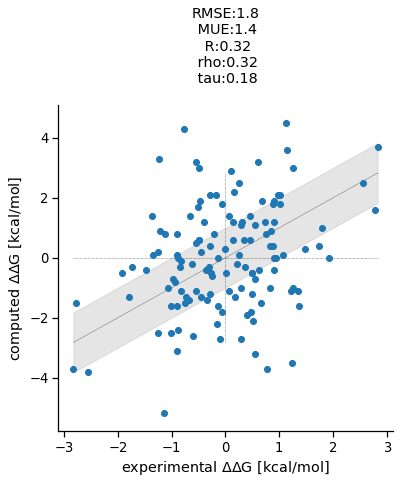

In [9]:
X,Y,error = extract_computed_experimental(name='mcl1')
RMSE_start, MUE_start, R_start, rho_start, tau_start = plotting_data(X,Y,error)

### p38

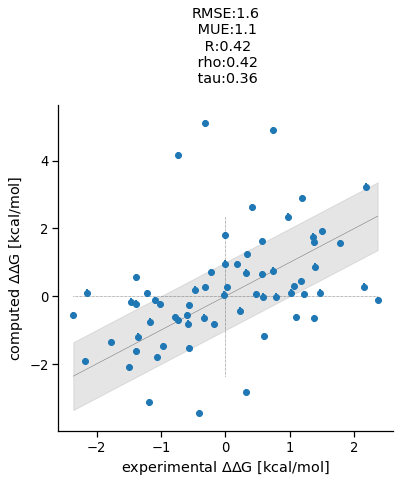

In [10]:
X,Y,error = extract_computed_experimental(name='p38')
RMSE_start, MUE_start, R_start, rho_start, tau_start = plotting_data(X,Y,error)

### p2p1b

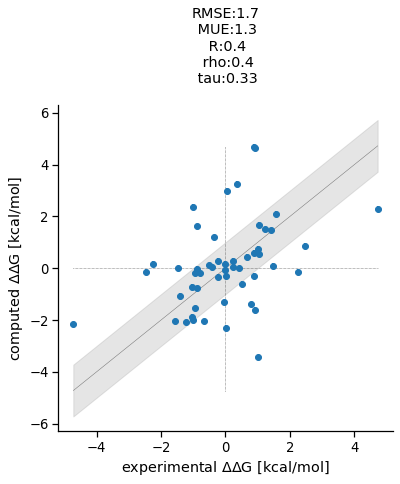

In [11]:
X,Y,error = extract_computed_experimental(name='ptp1b')
RMSE_start, MUE_start, R_start, rho_start, tau_start = plotting_data(X,Y,error)

### thrombin

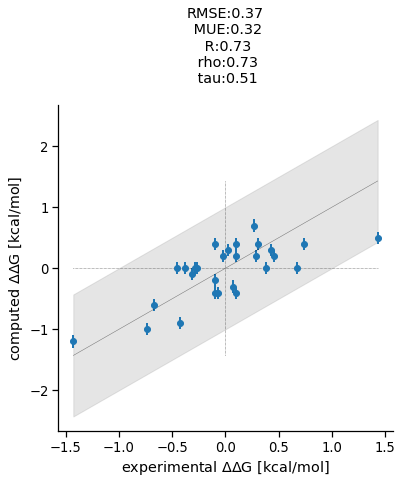

In [12]:
X,Y,error = extract_computed_experimental(name='thrombin')
RMSE_start, MUE_start, R_start, rho_start, tau_start = plotting_data(X,Y,error)